In [1]:
#导入包
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
#导入数据集
iris = load_iris()
data = iris.data
target = iris.target

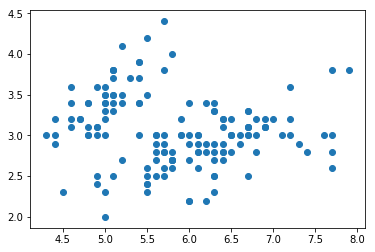

In [3]:
#将鸢尾花数据集画成图的形式。
x_point = data[:,0]
y_point = data[:,1]
plt.scatter(x_point,y_point)

In [4]:
# 计算欧式距离
def euclidDistance(x1, x2, sqrt_flag = True):
    res = np.sum((x1 - x2)**2)
    if sqrt_flag:
        res = np.sqrt(res)
    return res

# 计算距离矩阵
def calEuclidDistanceMatrix(X): 
    X = np.array(X)
    S = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i+1, len(X)): 
            S[i][j] = 1.0 * euclidDistance(X[i], X[j]) 
            S[j][i] = S[i][j] 
    return S

# 邻接矩阵
def myKNN(S, k, sigma = 0.187):
    N = len(S)
    A = np.zeros((N, N))
    for i in range(N):
        dist_with_index = zip(S[i], range(N))
        dist_with_index = sorted(dist_with_index, key = lambda x:x[0])
        neighbours_id = [dist_with_index[m][1] for m in range(k+1)]
        for j in neighbours_id:
            A[i][j] = np.exp(-S[i][j]/ 2/ sigma/ sigma)
            A[j][i] = A[i][j]
    return A


# 归一化的拉普拉斯矩阵
def calLaplacianMatrix(adjacentMatrix):
    degreeMatrix = np.sum(adjacentMatrix, axis = 1)
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix#
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)

In [5]:
# 距离矩阵
S=calEuclidDistanceMatrix(data)

# 邻接矩阵
A=myKNN(S,15)

# 标准化的拉普拉斯矩阵
Laplacian=calLaplacianMatrix(A)

In [6]:
# 特征值分解
lam, H = np.linalg.eig(Laplacian)
Hmax, Hmin = H.max(axis = 0), H.min(axis = 0)
H = (H - Hmin)/ (Hmax - Hmin)

In [7]:
x = KMeans(n_clusters = 3,n_init = 13, random_state = 23).fit(H)

In [8]:
#计算正确率
count = 0
for i in range(150):
    if target[i] == x.labels_[i]:
        count = count + 1
print(100* (count/ 150))

4.0


In [9]:
g = nx.Graph()
for i in range(150):
    g.add_node(i)
print(g.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


In [10]:
edgs = []
for i in range(150):
    for j in range(150):
        if(A[i][j] > 0):
            edgs.append((i,j))

In [11]:
colors = []
g.add_edges_from(edgs)
for i in range(150):
    if(target[i] == 0):
        colors.append('blue')
    elif(target[i] == 1):
        colors.append('red')
    else:
        colors.append('green')

C:\Users\zly\Anaconda3\envs\tensorflow\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


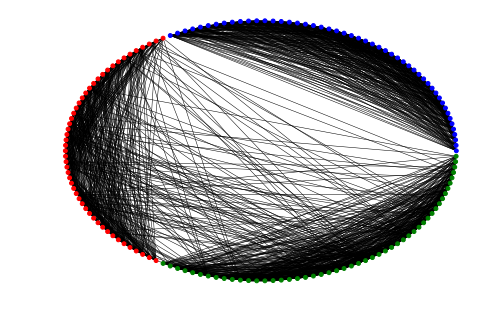

In [12]:
nx.draw(g,pos = nx.circular_layout(g), node_color = colors, node_size = 15, width = 0.5)
plt.show()